In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pathlib import Path
import random
import string
import os
import glob
import pickle as pkl
from autocorr_functions import *
import autocorr_cmls as accml

In [4]:
from pyproj import Proj, transform
import scipy.stats as stats
import sys
from pathlib import Path
# sys.path.append("../Iterative/")
# sys.path.append("../Kriging/")
sys.path.append("/home/adameshel/Documents/code/my_functions/")
from geoFunc import *
from analysis_funcs import *
import iterative_IDW_V1 as gmz
import kriging as krg
sys.path.append("/home/adameshel/Documents/code/") 
from helper_functions import *

In [11]:
my_path = Path('/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/')
fig_path_current = my_path.joinpath('figures')
fig_path = Path('/home/adameshel/Documents/code/autocorr/figures/')

In [12]:
dir_paths = glob.glob(str(my_path.absolute()) + '/*/')
idxs = []
i = 0
for p in dir_paths:
    if 'identicalF' in p:
        idxs.append(i)
        i+=1
        continue
    if '_cod' not in p:
        idxs.append(i)
        i+=1
        continue
        
    if '5T_ts370' in p:
        idxs.append(i)
    if '30T_ts16' in p:
        idxs.append(i)
    if '60T_ts29_cod100' in p:
        idxs.append(i)
    if '180T_ts9' in p:
        idxs.append(i)
    if '30T_ts11_cod120' in p:
        idxs.append(i)
    if '30T_ts14' in p:
        idxs.append(i)
    if '15T_ts23' in p:
        idxs.append(i)
        
        
    i+=1
dir_paths = delete_from_list(dir_paths,idxs)
dir_paths

['/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/180T_ts1_cod120optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts13_cod110optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/15T_ts22_cod120optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts12_cod110optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/180T_ts8_cod120optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/60T_ts29_cod120optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/90T_ts4_cod120optTrue_identicalTrue_mult1_DzerosFalse_N/',
 '/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts49_cod110optTrue_identicalTrue_

## Check only radar

<Figure size 432x288 with 0 Axes>

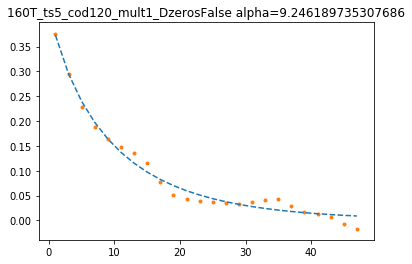

In [13]:
my_rad_path = Path('/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/')

for dr in sorted(os.listdir(my_rad_path)):
    if '160T_ts5' not in dr:
        continue
    if 'identicalFalse' in dr:
        identical = False
    else:
        identical = True
    for filename in sorted(os.listdir(my_rad_path.joinpath(dr))):
        agg = split_at(split_at(filename,'/',-2)[-1],'_',1)[0]
#         name = 'ac_' + split_at(agg,'T',1)[0] + str(identical)

        if 'df_radar' in filename:
            name_df = 'df_radar_' + split_at(agg,'T',1)[0]
            globals()[name_df] = pd.read_pickle(my_rad_path.joinpath(dr) / filename)
        if '_acf.pkl' in filename:
            with open(my_rad_path.joinpath(dr) / filename, 'rb') as f:
                name = 'ac_' + split_at(agg,'T',1)[0] + str(identical)
                globals()[name] = pkl.load(f)
        if 'alpha' in filename:
            with open(my_rad_path.joinpath(dr) / filename, 'rb') as f:
                alpha = pkl.load(f)
                alpha = alpha / 1e3
        if 'gamma' in filename:
            with open(my_rad_path.joinpath(dr) / filename, 'rb') as f:
                gamma = pkl.load(f)
        if 'beta' in filename:
            with open(my_rad_path.joinpath(dr) / filename, 'rb') as f:
                beta = pkl.load(f)
        if 'hs' in filename:
            with open(my_rad_path.joinpath(dr) / filename, 'rb') as f:
                hs = pkl.load(f)
        if 'nugget' in filename:
            with open(my_rad_path.joinpath(dr) / filename, 'rb') as f:
                nugget = pkl.load(f)
#         f.close()

    if 'alpha' not in locals():
    #         import pdb; pdb.set_trace()
        alpha = np.nan; beta = np.nan; gamma = np.nan
        print(dr)
        continue
    # if ~np.isnan(alpha):
    try:
        plt.subplots_adjust(hspace=0.1)
    #     ts = int(split_at(split_at(filename,'T_ts',1)[1],'_cod',1)[0])
        fig, ax = plt.subplots()
        ax.plot(hs/1e3,acf_original(hs/1e3,alpha,beta,gamma), '--C0')
        ax.scatter(hs/1e3, globals()[name]-nugget, c='C1',marker='.')
        ax.set_title(str(dr) + ' alpha=' + str(alpha))
#         print(alpha,beta,gamma)
    except:
        pass
    del alpha,beta,gamma

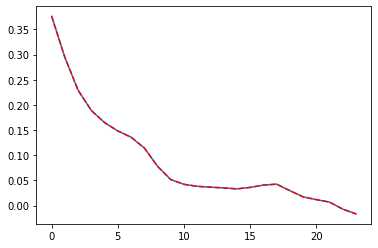

In [15]:
plt.plot(globals()[name]-nugget)
plt.plot(ac_old,'--r')

In [10]:
hs_old = hs/1e3
ac_old = globals()[name]-nugget

/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/180T_ts1_cod120optTrue_identicalTrue_mult1_DzerosFalse_N/
(50, 20)
10.0
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/180T_ts1_cod120_mult1_DzerosFalse
RADARRRRRRRR
df_radar.pkl
RADARRRRRRRR
rad180T_acf.pkl
RADARRRRRRRR
rad180T_alpha.pkl
RADARRRRRRRR
rad180T_beta.pkl
RADARRRRRRRR
rad180T_gamma.pkl
RADARRRRRRRR
rad180T_hs.pkl
RADARRRRRRRR
rad180T_nugget.pkl
NAME
ac_180True
29.598478328485307 12.223518184060653 1.2615649453532167
/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/30T_ts13_cod110optTrue_identicalTrue_mult1_DzerosFalse_N/
(50, 20)
0.1
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts13_cod110_mult1_DzerosFalse
RADARRRRRRRR
df_radar.pkl
RADARRRRRRRR
rad30T_acf.pkl
RADARRRRRRRR
rad30T_alpha.pkl
RADARRRRRRRR
rad30T_beta.pkl
RADARRRRRRRR
rad30T_gamma.pkl
RADARRRRRRRR
rad30T_hs.pkl
RADARRRRRRRR
rad30T_nugget.pkl
NAME
ac_30True
32.10190365952783

ValueError: Shape of passed values is (20, 1), indices imply (20, 20)

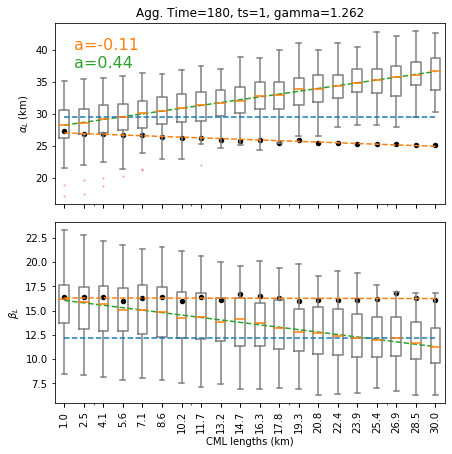

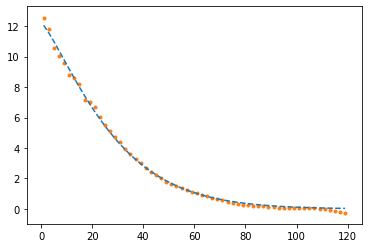

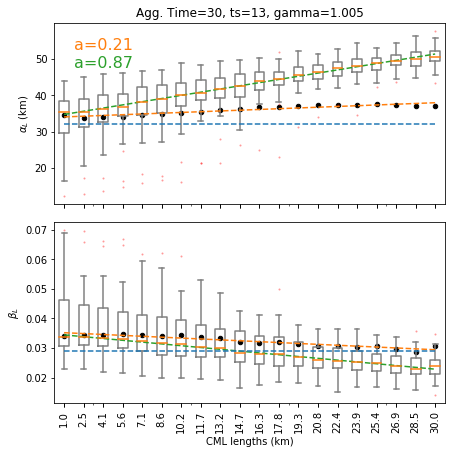

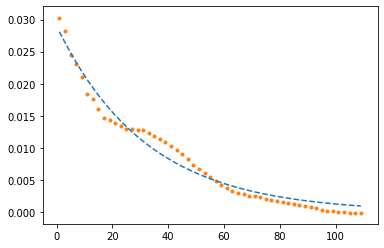

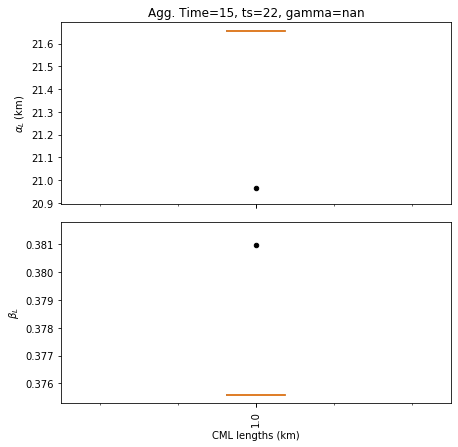

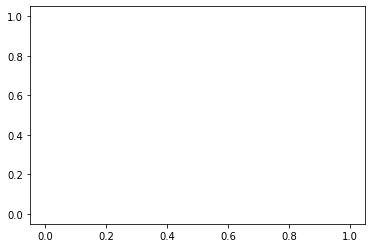

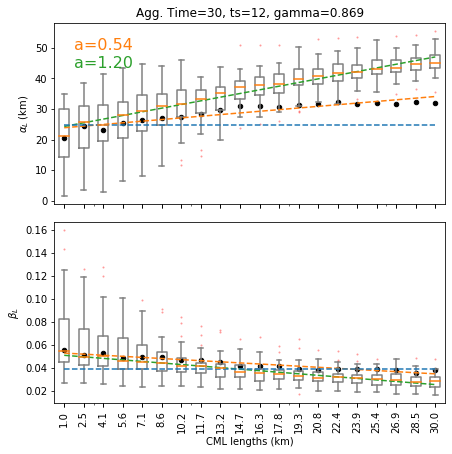

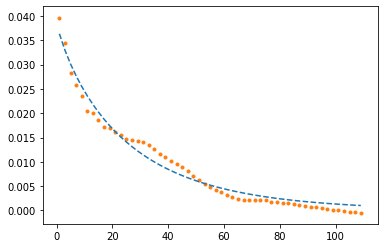

In [16]:
from autocorr_functions import *
a = 0.24; b = 3.49;
a = 0.72; b = 3.35;
B = 0#-1.1
fs = 16
list_of_snapshots = []
for i, dr in enumerate(dir_paths):
    sn = split_at(split_at(dr,'_',-5)[0] + \
    split_at(split_at(dr,'identical',1)[1],'_',1)[0],'/',-1)[1] +\
    'a_' + str(int(a*100)) + 'b_' + str(int(b*100))
    if sn not in list_of_snapshots:
        list_of_snapshots.append(sn)

def filter_par_arr(array):
    array[array[:,1]==888] = np.nan
    array[array[:,1]==777] = np.nan
    array[array[:,1]==666] = np.nan
    array[array[:,0] < 1e3] = np.nan
    array[array[:,1] > 600] = np.nan
    array[array[:,1] < 1e-2] = np.nan
    array[:,0] = array[:,0] / 1e3 # to make alpha units km
    return array

def linear(x,a,b):
    return a*x+b

for i, dr in enumerate(dir_paths):
    if 'identicalFalse' in dr:
        identical = False
    else:
        identical = True
    sn = split_at(split_at(dr,'_',-5)[0] + \
    split_at(split_at(dr,'identical',1)[1],'_',1)[0],'/',-1)[1] +\
    'ab_' + str(int(a*100)) + str(int(b*100))
    if sn not in list_of_snapshots:
        list_of_snapshots.append(sn)
        
    dir_path_current = Path(dr)
#     print(dir_path_current)
    agg = split_at(split_at(dr,'/',-2)[-1],'_',1)[0]
    beta_arr = []
    alpha_arr = []
    gamma_arr = []
    l_names = []
    
    print(dr)
    for filename in sorted(os.listdir(dir_path_current)):
        if 'ac_par' in filename:
            name = split_at(filename,'.',1)[0]
            with open(dir_path_current / filename, 'rb') as f:
                arr = pkl.load(f)
            f.close()
#             print(filename)
            arr = filter_par_arr(arr)
            arr = np.array(arr)
            arr = np.delete(arr,0,0)
            l=int(split_at(name,'_',-1)[1])
#             print(l)

            beta_arr.append(arr[:,1].T)
            alpha_arr.append(arr[:,0].T)
            gamma_arr.append(arr[:,2].T)

            l_names.append(str(l * 100))
    # sill_arr = np.concatenate(sill_arr)
    
    beta_arr = np.array(beta_arr)
    alpha_arr = np.array(alpha_arr)
    gamma_arr = np.array(gamma_arr)
    print(np.shape(beta_arr.T))
    df_beta = pd.DataFrame(beta_arr.T,columns=l_names)
    df_alpha = pd.DataFrame(alpha_arr.T,columns=l_names)
    df_gamma = pd.DataFrame(gamma_arr.T,columns=l_names)
    
    fig, ax = plt.subplots(2,1, figsize=(7,7), sharex=True)
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                      linestyle='none', markeredgecolor='g')
    
    cols = df_alpha.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_gamma.columns.values, cols))
    df_gamma.rename(columns=d,inplace=True)
    d = dict(zip(df_alpha.columns.values, cols))
    df_alpha.rename(columns=d,inplace=True)

    
    ##############################
    ##############################
    l_alpha_0 = []
    for i,L in enumerate(cols):
        alpha_0 = alpha_L_inv(
            np.array([L,df_gamma[L].median()]),
            a,
            df_alpha[L].median(),
            bias=B
        )
        l_alpha_0.append(alpha_0)
    l_alpha_0 = np.array(l_alpha_0)
    df_alpha_0 = pd.DataFrame(l_alpha_0)
#         print(df_alpha[L].median(), alpha_0)
    ##############################
    ##############################

    df_alpha.plot(kind='box',ax=ax[0],
                 color=dict(boxes='grey', whiskers='grey', medians='C1', caps='grey'),
                 boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(marker='o', 
                                 markerfacecolor='r', 
                                 markersize=2,
                                 linestyle='none',
                                 markeredgecolor='None', 
                                 alpha=0.4),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5),
                 showfliers=True, rot=90)
    ax[0].scatter(range(1,len(cols)+1),df_alpha_0[0].values, s=20, c='k')
    try:
        popt, _ = curve_fit(
            f=linear, 
            xdata=range(1,len(cols)+1), 
            ydata=df_alpha_0[0].values
        ) 
        ax[0].plot(range(1,len(cols)+1),
                  linear(range(1,len(cols)+1),popt[0],popt[1]),
                  '--C1')
        ax[0].text(0.05, 0.85, 'a=%.2f' %popt[0], 
                     fontsize=fs, 
                     color='C1',
                     transform=ax[0].transAxes);
    
        popt, _ = curve_fit(
            f=linear, 
            xdata=range(1,len(cols)+1), 
            ydata=df_alpha.median()
        ) 
        ax[0].plot(range(1,len(cols)+1),
                  linear(range(1,len(cols)+1),popt[0],popt[1]),
                  '--C2')
        ax[0].text(0.05, 0.75, 'a=%.2f' %popt[0], 
                     fontsize=fs, 
                     color='C2',
                     transform=ax[0].transAxes);
    except:
        pass
    
    cols = df_beta.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_beta.columns.values, cols))
    df_beta.rename(columns=d,inplace=True)

    
    ##############################
    ##############################
    l_beta_0 = []
    for i,L in enumerate(cols):
        beta_0 = beta_L_inv(
            L,
            b,
            df_beta[L].median(),
            l_alpha_0[i]
        )
        l_beta_0.append(beta_0)
    l_beta_0 = np.array(l_beta_0)
    df_beta_0 = pd.DataFrame(l_beta_0)
#         print(df_alpha[L].median(), alpha_0)
    ##############################
    ##############################
    df_beta.plot(kind='box',ax=ax[1],
                 color=dict(boxes='grey', whiskers='grey', medians='C1', caps='grey'),
                 boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(marker='o', 
                                 markerfacecolor='r', 
                                 markersize=2,
                                 linestyle='none',
                                 markeredgecolor='None', 
                                 alpha=0.4),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5),
                 showfliers=True, rot=90)
    ax[1].scatter(range(1,len(cols)+1),df_beta_0[0].values, s=20, c='k')
    
    try:
        magnitude_beta = 10 ** (round(np.log10(np.nanmean(df_beta_0[0].values))))
        print(magnitude_beta)
        popt, _ = curve_fit(
            f=linear, 
            xdata=range(1,len(cols)+1), 
            ydata=df_beta_0[0].values / magnitude_beta
        ) 
        popt = popt * magnitude_beta
        ax[1].plot(range(1,len(cols)+1),
                  linear(range(1,len(cols)+1),popt[0],popt[1]),
                  '--C1')
        magnitude_beta = 10 ** (round(np.log10(np.nanmean(df_beta.median()))))
        popt, _ = curve_fit(
            f=linear, 
            xdata=range(1,len(cols)+1), 
            ydata=df_beta.median() / magnitude_beta
        ) 
        popt = popt * magnitude_beta
        ax[1].plot(range(1,len(cols)+1),
                  linear(range(1,len(cols)+1),popt[0],popt[1]),
                  '--C2')
    except:
        pass
    try:
        f = open(dr + "rad_dir.txt", "r")
        for i, line in enumerate(f):
            print(line)
            rad_path_current = Path(line)
            f.close()
            break

        for filename in sorted(os.listdir(rad_path_current)):

            if 'df_radar' in filename:
                name_df = 'df_radar_' + split_at(agg,'T',1)[0] + str(identical)
                globals()[name_df] = pd.read_pickle(rad_path_current / filename)
            if '_acf.pkl' in filename:
                with open(rad_path_current / filename, 'rb') as f:
                    name = 'ac_' + split_at(agg,'T',1)[0] + str(identical)
                    globals()[name] = pkl.load(f)
            if 'alpha' in filename:
                with open(rad_path_current / filename, 'rb') as f:
                    alpha = pkl.load(f)
                    alpha = alpha / 1e3
            if 'gamma' in filename:
                with open(rad_path_current / filename, 'rb') as f:
                    gamma = pkl.load(f)
            if 'beta' in filename:
                with open(rad_path_current / filename, 'rb') as f:
                    beta = pkl.load(f)
            if 'hs' in filename:
                with open(rad_path_current / filename, 'rb') as f:
                    hs = pkl.load(f)
            if 'nugget' in filename:
                with open(rad_path_current / filename, 'rb') as f:
                    nugget = pkl.load(f)
            f.close()
    except:
        pass
    if 'alpha' not in locals():
#         import pdb; pdb.set_trace()
        alpha = np.nan; beta = np.nan; gamma = np.nan
    plt.subplots_adjust(hspace=0.1)
    ts = int(split_at(split_at(dr,'T_ts',1)[1],'_cod',1)[0])
    ax[0].set_title('Agg. Time=%s, ts=%i, gamma=%s' %(split_at(agg,'T',1)[0],
                                                                       ts,
                                                                       str(round(gamma,3)))
                   )
    ax[0].set_ylabel(r'$\alpha_L$ (km)')
    ax[1].set_ylabel(r'$\beta_L$')
    ax[1].set_xlabel('CML lengths (km)')

    line = range(1,len(cols)+1)
    ax[0].plot(line, np.ones_like(line) * alpha, '--')
#     ax[0].text(18, alpha-alpha/7, r'rad $\alpha_L$', fontsize=11, color='C0')
    ax[1].plot(line, np.ones_like(line) * beta, '--')
#     ax[1].text(18, beta+beta/12, r'rad $\beta_L$', fontsize=11, color='C0')
    print('NAME')
    print(name)
    fig, ax = plt.subplots()
    ax.plot(hs/1e3,acf_original(hs/1e3,alpha,beta,gamma), '--C0')
    try:
        ax.scatter(hs/1e3, globals()[name]-nugget, c='C1',marker='.')
    except:
        pass
    print(alpha,beta,gamma)
    del alpha,beta,rad_path_current
#     fig.savefig(str(fig_path) + '/semireal_pars_agg_' + sn + '.png', bbox_inches='tight')
#     print(dir_path_current)
#     fig.savefig(str(fig_path_current) + '/semireal_pars_agg_' + sn + '.png', bbox_inches='tight')
#     print(dir_path_current)

In [234]:
aa = np.array([[1,2,3], [5,4,5], [7,3,1], [0,9,4]])
np.sort(aa,axis=0,order=[0,2,1])

ValueError: Cannot specify order when the array has no fields.

/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/180T_ts1_cod120_mult1_DzerosFalse
0.2615649453532167
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts13_cod110_mult1_DzerosFalse
0.005026691564130159
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts12_cod110_mult1_DzerosFalse
-0.13061106793741672
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/180T_ts8_cod120_mult1_DzerosFalse
-0.3100628646849497
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/60T_ts29_cod120_mult1_DzerosFalse
0.09795110328570367
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts49_cod110_mult20_DzerosFalse
-0.5069617710100105
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/5T_ts360_cod50_mult20_DzerosFalse
-0.13143035742318732
/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/30T_ts11_cod110_mult20_DzerosFalse
0.206789

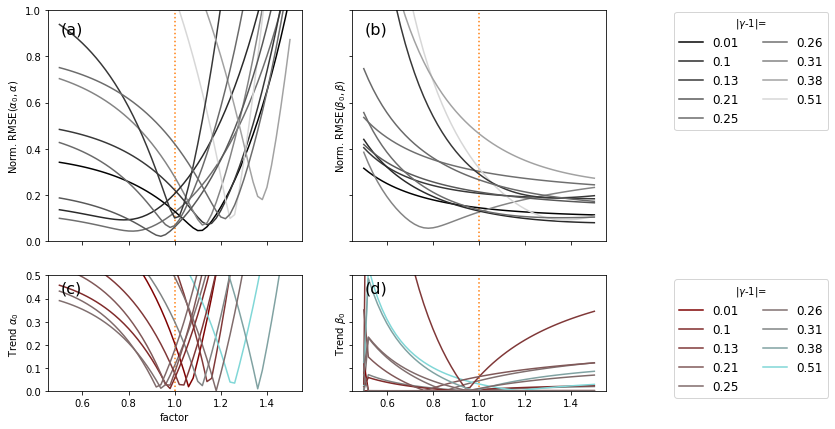

In [245]:
from autocorr_functions import *
factor = np.linspace(0.5,1.5,51)

list_of_rmsea = []
list_of_rmseb = []
l_delta_gammas = []
l_factors = []
l_slope = []


c = np.linspace(0.0,1.0,len(dir_paths))
        
fig, ax = plt.subplots(2,2, figsize=(10,7), sharey='row', sharex=True,
                      gridspec_kw={'height_ratios': [2, 1]})

for i, dr in enumerate(dir_paths):
    dir_path_current = Path(dr)
    agg = split_at(split_at(dr,'/',-2)[-1],'_',1)[0]
    globals()["rmsea" + agg] = []
    globals()["rmseb" + agg] = []
    globals()["a" + agg] = []
    globals()["b" + agg] = []
    list_of_rmsea.append("rmsea" + agg)
    list_of_rmseb.append("rmsea" + agg)
    beta_arr = []
    alpha_arr = []
    gamma_arr = []
    l_names = []
    #################
    f = open(dr + "rad_dir.txt", "r")
    for _, line in enumerate(f):
        print(line)
        rad_path_current = Path(line)
        f.close()
        break
        
    for filename in sorted(os.listdir(rad_path_current)):
        if 'alpha' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                alpha = pkl.load(f)
                alpha = alpha / 1e3
        elif 'beta' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                beta = pkl.load(f)
        elif 'gamma' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                gamma = pkl.load(f)
        elif 'hs' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                hs = pkl.load(f)
        elif 'nugget' in filename:
            with open(rad_path_current / filename, 'rb') as f:
                nugget = pkl.load(f)
    for filename in sorted(os.listdir(dir_path_current)):
        if 'ac_par' in filename:
            name = split_at(filename,'.',1)[0]
            with open(dir_path_current / filename, 'rb') as f:
                arr = pkl.load(f)
            f.close()
            arr = filter_par_arr(arr)
            arr = np.array(arr)
            arr = np.delete(arr,0,0)
            l=int(split_at(name,'_',-1)[1])
#             print(l)

            beta_arr.append(arr[:,1].T)
            alpha_arr.append(arr[:,0].T)
            gamma_arr.append(arr[:,2].T)

            l_names.append(str(l * 100))
    # sill_arr = np.concatenate(sill_arr)
    beta_arr = np.array(beta_arr)
    alpha_arr = np.array(alpha_arr)
    gamma_arr = np.array(gamma_arr)

    df_beta = pd.DataFrame(beta_arr.T,columns=l_names)
    df_alpha = pd.DataFrame(alpha_arr.T,columns=l_names)
    df_gamma = pd.DataFrame(gamma_arr.T,columns=l_names)
    
    cols = df_alpha.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_gamma.columns.values, cols))
    df_gamma.rename(columns=d, inplace=True)
    d = dict(zip(df_alpha.columns.values, cols))
    df_alpha.rename(columns=d, inplace=True)
    alpha_meds = df_alpha.median()

    cols = df_beta.columns.values.astype(np.float) / 1e3
    cols.astype(str)
    d = dict(zip(df_beta.columns.values, cols))
    df_beta.rename(columns=d, inplace=True)
    beta_meds = df_beta.median()

    for _, f in enumerate(factor):
        l_alpha_0 = []
        for _,L in enumerate(cols):
            alpha_0 = alpha_L_inv(
                np.array([L,df_gamma[L].median()]),
                a * f,
                df_alpha[L].median(),
                bias=B
            )
            l_alpha_0.append(alpha_0)
        l_alpha_0 = np.array(l_alpha_0)
        df_alpha_0 = pd.DataFrame(l_alpha_0)
        globals()["rmsea" + agg].append(
            rmse(df_alpha_0[0],
                 np.ones_like(cols) * alpha) / alpha
        )
        popt, _ = curve_fit(
            f=linear, 
            xdata=range(1,len(cols)+1), 
            ydata=df_alpha_0[0].values
        ) 
        globals()["a" + agg].append(abs(popt[0]))

        l_delta_gammas.append(round(abs(gamma-1),3))
        l_factors.append(round(f,3))
        l_slope.append(round(abs(popt[0]),3))
        
        popt, _ = curve_fit(
            f=linear, 
            xdata=range(1,len(cols)+1), 
            ydata=df_beta_0[0].values
        ) 
        globals()["b" + agg].append(abs(popt[0]))
        l_beta_0 = []
        for _,L in enumerate(cols):
            beta_0 = beta_L_inv(
                L,
                b * f,
                df_beta[L].median(),
                alpha
            )
            l_beta_0.append(beta_0)
        l_beta_0 = np.array(l_beta_0)
        df_beta_0 = pd.DataFrame(l_beta_0)
        globals()["rmseb" + agg].append(
            rmse(df_beta_0[0],
                 np.ones_like(cols) * beta) / beta
        )
        bmax = np.nanmax(globals()["rmseb" + agg])
    
    gs = np.array([abs(gamma-1)/0.6, abs(gamma-1)/0.6, abs(gamma-1)/0.6])
    gs_slope = np.array([0.3/0.6, abs(gamma-1)/0.6, abs(gamma-1)/0.6])
    print(gamma-1)
    if 'identicalTrue' in dr:
        ax[0,1].plot(factor,globals()["rmseb" + agg],label=round(abs(gamma-1),2),color=gs)
        ax[0,0].plot(factor,globals()["rmsea" + agg],label=round(abs(gamma-1),2),color=gs)
        ax[1,0].plot(factor,globals()["a" + agg],label=round(abs(gamma-1),2),color=gs_slope)
        ax[1,1].plot(factor,globals()["b" + agg],label=round(abs(gamma-1),2),color=gs_slope)
    else:
        ax[0,1].plot(factor,globals()["rmseb" + agg],color=gs, linestyle='--')
        ax[0,0].plot(factor,globals()["rmsea" + agg],color=gs, linestyle='--')
        ax[1,0].plot(factor,globals()["a" + agg],color=gs_slope, linestyle='--')
        ax[1,1].plot(factor,globals()["b" + agg],color=gs_slope, linestyle='--')

delta_gammas = np.array(l_delta_gammas)
factors = np.array(l_factors)
slopes = np.array(l_slope)

delta_gammas = delta_gammas.reshape(
    len(dir_paths),len(factor)
)
factors = factors.reshape(
    len(dir_paths),len(factor)
)
slopes = slopes.reshape(
    len(dir_paths),len(factor)
)

ax[0,0].vlines(1,0,1.5,colors='C1',linestyles='dotted')
ax[0,1].vlines(1,0,1.5,colors='C1',linestyles='dotted',label='Theoretical value')
ax[1,0].vlines(1,0,1.5,colors='C1',linestyles='dotted')
ax[1,1].vlines(1,0,1.5,colors='C1',linestyles='dotted')
ax[0,0].set_ylim(0,1); ax[0,1].set_ylim(0,1)
ax[1,0].set_ylim(0,0.5); ax[1,1].set_ylim(0,0.5)
ax[0,0].set_ylabel(r'Norm. RMSE($\alpha_0,\alpha$)')
ax[0,1].set_ylabel(r'Norm. RMSE($\beta_0,\beta$)')
ax[1,0].set_ylabel(r'Trend $\alpha_0$')
ax[1,1].set_ylabel(r'Trend $\beta_0$')
ax[1,1].set_xlabel('factor')
ax[1,0].set_xlabel('factor')
combine_legend_subplots((0,0),xy=(3.1, 1.02),ax=ax,ncol=2,title=r'|$\gamma$-1|=')
combine_legend_subplots((1,0),xy=(3.1, 1.02),ax=ax,ncol=2,title=r'|$\gamma$-1|=')
ax[0,0].text(0.05, 0.9, '(a)', fontsize=fs, color='k',transform=ax[0,0].transAxes);
ax[0,1].text(0.05, 0.9, '(b)', fontsize=fs, color='k',transform=ax[0,1].transAxes);
ax[1,0].text(0.05, 0.85, '(c)', fontsize=fs, color='k',transform=ax[1,0].transAxes);
ax[1,1].text(0.05, 0.85, '(d)', fontsize=fs, color='k',transform=ax[1,1].transAxes);

#     fig.savefig(str(dir_path_current) + '/pars_agg_' + agg + '.png', bbox_inches='tight')
#     print(dir_path_current)



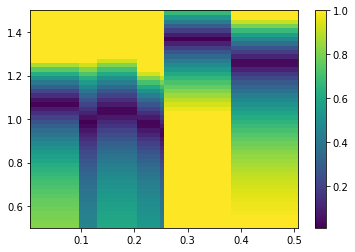

In [251]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(delta_gammas,
                  factors,
                  slopes,
                  vmax=1)
plt.colorbar(pc)

In [253]:
dr = '/home/adameshel/Documents/code/autocorr/radar_autocorr_snaps/with_gamma/60T_ts29_cod120_mult1_DzerosFalse'
if len(os.listdir(dr) ) == 0:
    print('empty')

In [24]:
l_alpha_0 = []
for i,L in enumerate(cols):
    alpha_0 = alpha_L_inv(L,
                          0.3,
                         df_alpha[L].median())
    l_alpha_0.append(alpha_0)
    df_alpha_0 = pd.DataFrame(np.array(l_alpha_0))
    print(df_alpha[L].median(), alpha_0)

8.82324137743689 8.79324137743689
9.328162892648711 8.818162892648711
10.315894799677551 9.35589479967755
10.264763046142594 8.824763046142595
10.58579045493123 8.66579045493123
10.806869968634311 8.406869968634311
11.556931543196075 8.706931543196076
12.531018206564049 9.201018206564049
12.457985044330663 8.647985044330664
12.17205934669029 7.88205934669029
13.243523904926732 8.503523904926732
13.070189630606517 7.8501896306065175
13.485723539086681 7.785723539086681
13.290134608934107 7.110134608934106
13.501852447100532 6.871852447100532
14.206879823783787 7.096879823783787
14.36560006878571 6.77560006878571
15.6127579607599 7.542757960759902
16.281319752016646 7.761319752016647
14.709221730541705 5.709221730541705


In [21]:
for i,L in enumerate(cols):
    alpha_0 = alpha_L_inv(L,
                          0.3,
                         df_alpha[L].median())
    print(df_alpha[L].median(), alpha_0)

8.82324137743689 8.49324137743689
9.328162892648711 8.51816289264871
10.315894799677551 9.05589479967755
10.264763046142594 8.524763046142594
10.58579045493123 8.36579045493123
10.806869968634311 8.10686996863431
11.556931543196075 8.406931543196075
12.531018206564049 8.901018206564048
12.457985044330663 8.347985044330663
12.17205934669029 7.58205934669029
13.243523904926732 8.203523904926731
13.070189630606517 7.550189630606518
13.485723539086681 7.485723539086681
13.290134608934107 6.810134608934106
13.501852447100532 6.571852447100532
14.206879823783787 6.7968798237837875
14.36560006878571 6.4756000687857105
15.6127579607599 7.242757960759902
16.281319752016646 7.461319752016647
14.709221730541705 5.409221730541705


In [2]:
%load_ext snakeviz

In [26]:
# %%snakeviz
import numpy as np
from scipy.linalg.special_matrices import leslie
from pathlib import Path
##
agg_times = ['90T']
ts = 1#2,8,9,11 14 26 49#120#22#3*17 #timestamp
identical_l = True
save_cml = False
shortest = 1.0; longest = 30.0
num_of_ls = 1#20
cml_cent_sim = range(1)#50
mult = 2 # simply for making the rain stronger
cod = 120 #cutoff distance (km)
aggregation_mean = False
opt = True
bandwidth = 1.0 # km
links_density = 0.03 # km**-2 # original=0.012   0.05
discard_zeros = False ## Discard zeros from cmls not yet working
l_dist = 'U' # E- exponent, U- uniform, N- none
if identical_l == True: 
    l_dist = 'N'
# dir_path = Path('/home/adameshel/Documents/code/autocorr/semi_real/main_with_gamma/')

if identical_l is False:
    diff = longest - shortest
    lag = diff / 5
    shortest = shortest + lag
    longest = longest - lag
cml_lengths = np.linspace(shortest,longest,num_of_ls)

import xarray as xr
import pandas as pd
import random
import string
import glob
import os
from autocorr_functions import *
import autocorr_cmls as accml

raw_path = Path('/home/adameshel/Documents/code/kit_code/\
2d_method_intercomparison/data/raw/')

list_of_datasets = []
ds_radolan = xr.open_mfdataset(
    str(raw_path.joinpath('radklim_yw_for_adam.nc').absolute()),
                              combine='by_coords'
                              )

from pyproj import Proj, transform
import scipy.stats as stats
import sys
from pathlib import Path
# sys.path.append("../Iterative/")
# sys.path.append("../Kriging/")
sys.path.append("/home/adameshel/Documents/code/my_functions/")
from geoFunc import *
import iterative_IDW_V1 as gmz
import kriging as krg
sys.path.append("/home/adameshel/Documents/code/") 
from helper_functions import split_at
import shutil

current = str(str(agg_times[0]) + '_ts' +\
                str(ts) + '_cod' + str(int(cod)) +\
                'opt' + str(opt) + '_identical' +\
                str(identical_l) + '_mult' +\
                str(mult) + '_Dzeros' +\
                str(discard_zeros) +\
                '_'+ str(l_dist))
# dir_path_current = dir_path.joinpath(current)
if save_cml==True:
    if os.path.exists(dir_path_current):
        print('Replacing exsisting directory')
        shutil.rmtree(dir_path_current)
    os.makedirs(dir_path_current)

rad_current = str(str(agg_times[0]) + '_ts' +\
                str(ts) + '_cod' + str(int(cod)) +\
                '_mult' +\
                str(mult) + '_Dzeros' +\
                str(discard_zeros))
rad_path_parent = Path(
    '/home/adameshel/Documents/code/autocorr/' +\
        'radar_autocorr_snaps/with_gamma/'
    )

rad_paths = glob.glob(str(rad_path_parent.absolute()) + '/*/')
rad_path_current =  rad_path_parent.joinpath(rad_current)
if str(rad_path_current) + '/' not in rad_paths:
    analyze_radar = True
#     os.mkdir(rad_path_current)
else:
    analyze_radar = False

start_time_idx = 0#15
end_time_idx = -1#70#340#len(ds_radolan_cut.time)
############################
####### CHANGE DOMAIN ######
## Medium cut
min_lat = 47.6890
min_lon = 8.1873
max_lat = 49.1185
max_lon = 10.0978

# min_lat = 47.8890
# min_lon = 8.9873
# max_lat = 49.2185
# max_lon = 10.6978

## Interesting cut big rectangle south
# min_lat = 48.000
# min_lon = 8.2000
# max_lat = 50.00
# max_lon = 11.5000

ds_radolan_cut = ds_radolan.where((ds_radolan['latitudes'] >= min_lat) &
                                 (ds_radolan['latitudes'] <= max_lat) & 
                                 (ds_radolan['longitudes'] >= min_lon) &
                                 (ds_radolan['longitudes'] <= max_lon),
                                 drop=True)

proj_degrees = Proj(init='epsg:4326')
proj_meters = Proj(init='epsg:3043')#3857 FROM MAX  #3395 #3043 UTM

# from pyproj import Transformer
x_grid_utm, y_grid_utm = transform(proj_degrees, 
                         proj_meters, 
                         ds_radolan_cut.longitudes.values, 
                         ds_radolan_cut.latitudes.values)


# transformer = Transformer.from_proj(proj_degrees, proj_meters)
# x_grid_utm, y_grid_utm = transformer.transform(
#     ds_radolan_cut.longitudes.values, 
#     ds_radolan_cut.latitudes.values
# )

ds_radolan_cut.coords['x_utm'] = (('y', 'x'), x_grid_utm)
ds_radolan_cut.coords['y_utm'] = (('y', 'x'), y_grid_utm)

time_frame = ds_radolan_cut.time[start_time_idx:end_time_idx]
num_of_ts = len(time_frame)
ds_radolan_GT = ds_radolan_cut.where(ds_radolan_cut.time == \
             ds_radolan_cut.time[start_time_idx:end_time_idx])
ds_radolan_GT = ds_radolan_GT.rename({'rainfall_amount':'raindepth'})

import pycomlink as pycml
import pickle as pkl

rain_mat = ds_radolan_GT.raindepth.values #12 # to make it mm/h
# rain_mat[rain_mat < 0.1] = 0.0
rain_mat = rain_mat * mult
del ds_radolan_GT
ds_radolan_GT = xr.Dataset(
    data_vars={'raindepth': (('time','y', 'x'), rain_mat)},
    coords={'lon_grid': (('y', 'x'), ds_radolan_cut.longitudes.values),
            'lat_grid': (('y', 'x'), ds_radolan_cut.latitudes.values),
            'x_utm': (('y', 'x'), ds_radolan_cut.x_utm.values),
            'y_utm': (('y', 'x'), ds_radolan_cut.y_utm.values),
            'time': time_frame,
            'x': ds_radolan_cut.x.values,
            'y': ds_radolan_cut.y.values})

def cml_lat_lon_to_UTM(df):
    df['xa'], df['ya'] = transform(proj_degrees, 
                                   proj_meters, 
                                   df['site_a_longitude'].values, 
                                   df['site_a_latitude'].values)
    df['xb'], df['yb'] = transform(proj_degrees, 
                                   proj_meters, 
                                   df['site_b_longitude'].values, 
                                   df['site_b_latitude'].values)
    return df

def link_id_gen(
    num_of_ids=1, size=8, chars=string.ascii_uppercase + string.digits
    ):
    my_id_list = list()
    for i in range(num_of_links):
        my_id = ''.join(random.choice(chars) for _ in range(size))
        my_id_list.append(my_id[:4] + '-' + my_id[4:])
    return my_id_list
 
km_in_start = 11
km_in_end = -12
x1 = ds_radolan_GT.x_utm.values[km_in_start:km_in_end]
y1 = ds_radolan_GT.y_utm.values[km_in_start:km_in_end]

for il, l in enumerate(cml_lengths):
    length_name = round(l,1)
    length_name = split_at(str(format(length_name/100, '.3f')),'.',1)[-1]
    globals()['ac_par_il_' + length_name] = np.array([999,999,999])
    if save_cml==True:
        with open(dir_path_current.joinpath(
            'ac_par_il_' + length_name + '.pkl'
            ), 'wb') as f:
            pkl.dump(globals()['ac_par_il_' + length_name], f)
        f.close()

for ic, c in enumerate(cml_cent_sim):
    print('ITERATION %i' %ic)
    x = []
    y = []
    for i in range(len(x1)):
        x_temp = x1[i][km_in_start:km_in_end]
        y_temp = y1[i][km_in_start:km_in_end]
        x.append(x_temp)
        y.append(y_temp)
    x = np.array(x)
    y = np.array(y)
    bools = np.random.uniform(0,1,len(x.ravel())) > (1-links_density)
    x_links_cent = np.compress(bools,x)
    y_links_cent = np.compress(bools,y)

    num_of_links = len(y_links_cent)
    print('NUM OF LINKS IS %i' %num_of_links)

    x_links_cent = x_links_cent + np.random.normal(
        loc=0.0,
        scale=10.2,
        size=num_of_links
        )
    y_links_cent = y_links_cent + np.random.normal(
        loc=0.0,
        scale=10.2,
        size=num_of_links
        )

    links_cent = np.column_stack((x_links_cent,y_links_cent))

    cml_ids = link_id_gen(num_of_ids=num_of_links)

    for il, l in enumerate(cml_lengths):
        print('LENGTHS: %.2f' %l)
        ang = np.radians(
            np.random.uniform(low=0.0, high=179.9999, size=[num_of_links,1])
            )
        ang = np.squeeze(ang)
        links_lengths = l * 1e3 #np.ones(shape=[num_of_links,1])
        if identical_l is False:
            lower, upper, = (l-lag)*1e3, (l+lag)*1e3
            if l_dist == 'E':
                links_mean_length = l * 1e3
                X = stats.truncexpon(b=(upper-lower)/links_mean_length, 
                                    loc=lower, 
                                    scale=links_mean_length)
                links_lengths = X.rvs(num_of_links)
            elif l_dist == 'U':
                links_lengths = np.random.uniform(lower,upper,num_of_links)

        links_xa = (-links_lengths/2)*np.cos(ang) + links_cent[:,0]
        links_ya = (-links_lengths/2)*np.sin(ang) + links_cent[:,1]
        links_xb = (links_lengths/2)*np.cos(ang) + links_cent[:,0] 
        links_yb = (links_lengths/2)*np.sin(ang) + links_cent[:,1]

        lons_a, lats_a = transform(
            proj_meters, 
            proj_degrees, 
            links_xa, 
            links_ya
            )
        lons_b, lats_b = transform(
            proj_meters, 
            proj_degrees, 
            links_xb, 
            links_yb
            )

        df_sim_input = pd.DataFrame(
            columns= ['cml_id',
                'site_a_longitude',
                'site_b_longitude',
                'site_a_latitude',
                'site_b_latitude',
                'Frequency',
                'Length',
                'Polarization',
                'a','b','time','R_radolan','A']
            )

        df_sim_input['cml_id'] = cml_ids

        df_sim_input['Frequency'] = 23
        df_sim_input['site_a_longitude'], df_sim_input['site_a_latitude'] = \
                                transform(proj_meters, 
                                 proj_degrees, 
                                 links_xa, 
                                 links_ya)
        df_sim_input['site_b_longitude'], df_sim_input['site_b_latitude'] = \
                                transform(proj_meters, 
                                 proj_degrees, 
                                 links_xb, 
                                 links_yb)
        df_sim_input['Polarization'] = np.random.choice(
            ['H', 'V', 'V'], 
            df_sim_input.shape[0]
            )
        df_sim_input['Length'] = links_lengths / 1e3 # km

        for i, cml in df_sim_input.iterrows():
            df_sim_input.loc[i,'a'], df_sim_input.loc[i,'b'] = \
                pycml.processing.A_R_relation.A_R_relation.a_b(
                    cml['Frequency'],
                    cml['Polarization']
                    )

        df_sim_input.drop(['time'],axis='columns',inplace=True)
        # df_sim_input = df_sim_input.drop_vars('time')

        d_weights = {}
        for j, cml in enumerate(df_sim_input.cml_id.values): 
            intersec_weights = pycml.validation.validator.calc_intersect_weights(
                        x1_line=df_sim_input.site_a_longitude.values[j],
                        y1_line=df_sim_input.site_a_latitude.values[j],
                        x2_line=df_sim_input.site_b_longitude.values[j],
                        y2_line=df_sim_input.site_b_latitude.values[j],
                        x_grid=ds_radolan_GT.lon_grid.values,
                        y_grid=ds_radolan_GT.lat_grid.values,
                        grid_point_location='center')
            d_weights[cml] = intersec_weights


        list_of_GT_datasets = []
        list_of_radolan_along_cml = []
        QUANT = 'with'
        NOISE = 'with'

        for at, agg in enumerate(agg_times):
            # dir_path_current = dir_path.joinpath(str(agg_times[at]) + '_ts' +\
            #                               str(ts) + '_cod' + str(int(cod)) +\
            #                              'opt' + str(opt))
            # try:
            #     os.mkdir(dir_path_current)
            # except:
            #     nothing = 0
            print(str("ds_radolan_GT_" + agg))
            num_of_mins = float(split_at(agg,'T',1)[0])
            if aggregation_mean == True:
                globals()["ds_radolan_GT_" + agg] = ds_radolan_GT.resample(
                    time=agg, label='right', 
                    restore_coord_dims=False).mean(dim='time')
            else:
                globals()["ds_radolan_GT_" + agg] = ds_radolan_GT.resample(
                    time=agg, label='right', 
                    restore_coord_dims=False).sum(dim='time')
            list_of_GT_datasets.append(str("ds_radolan_GT_" + agg))

            path_ave_time = np.zeros(
                (len(df_sim_input.cml_id)))
            for j, cml in enumerate(df_sim_input.cml_id.values):
                path_ave_time[j] = round(
                    np.nansum(
                        d_weights[cml] * globals()["ds_radolan_GT_" + agg].\
                               raindepth.isel(time=ts).values), 
                                                6
                        )# * intensity_factor)

            df_sim_input['R_radolan'] = path_ave_time
            ## Discard zeros from cmls not yet working
            # if discard_zeros is True:
            #     df_sim_input = df_sim_input.where(df_sim_input['R_radolan'] < 0.0001)
            #     df_sim_input = df_sim_input[df_sim_input['R_radolan'].notna()]
            #     df_sim_input.reset_index(inplace=True,drop=True)

        df_sim_input.rename(columns = {'cml_id':'Link_num',
                                              'R_radolan':'R',
                                              'Length':'L',
                                              'Frequency':'F'}, 
                                   inplace=True)
        df_sim_input = cml_lat_lon_to_UTM(df_sim_input)
        df_sim_input, _ = gmz.create_virtual_gauges(df_sim_input, 
                                        num_gauges=1)

        ac = accml.Autocorr(df_sim_input, bw=bandwidth, cutoff_distance_km=cod)
        ac(optimize=opt)

/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code

ITERATION 0
NUM OF LINKS IS 563
LENGTHS: 1.00


/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:261: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:267: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:289: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:294: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


ds_radolan_GT_90T


/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:169: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:173: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
/home/adameshel/Documents/code/autocorr/autocorr_cmls.py:180: RuntimeWarning: invalid value encountered in less_equal
  sub = np.where( sub <= h+bw,sub,np.nan )


Max=0.00109
[3.68190207e+01 9.94576553e-04 1.07528803e+00]
[2.91943739e-01 7.09547645e-06 8.83533177e-03]


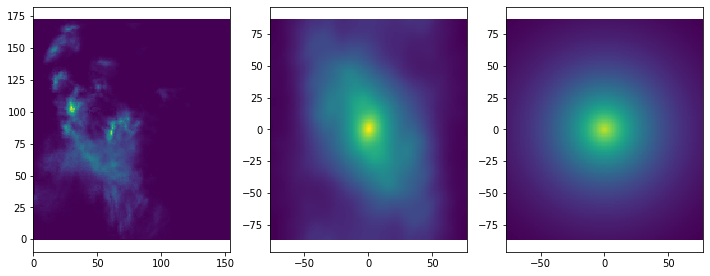

In [42]:
# agg = ['60T']
# globals()["ds_radolan_GT_" + agg] = ds_radolan_GT.resample(
#     time=agg, label='right', 
#     restore_coord_dims=False).sum(dim='time')
ts = 4
Z = ds_radolan_GT_90T.raindepth.isel(time=ts).values
lenx = np.shape(ds_radolan_GT_60T.x_utm.values)[1]
x = np.linspace(-lenx/2,lenx/2,lenx)
leny = np.shape(ds_radolan_GT_60T.y_utm.values)[0]
y = np.linspace(-leny/2,leny/2,leny)
X, Y = np.meshgrid(x,y)
fft = np.fft.fftshift((np.fft.fft2(Z))) / len(Z.ravel())
s = abs(np.fft.fftshift(np.fft.ifft2(fft*np.conjugate(fft))))

fig, ax = plt.subplots(1,3, figsize=(12,4.5))
ax[0].pcolormesh(Z)
pc = ax[1].pcolormesh(X,Y,s,vmax=np.nanmax(s))
# plt.colorbar(pc)
print('Max=%.5f' %np.nanmax(abs(s)))

def func(x, alpha, beta, gamma):
    return beta * np.exp(-(np.sqrt(x[0]**2 + x[1]**2) / alpha) ** gamma)

xdata = np.vstack((X.ravel(), Y.ravel()))
pars, pcov = curve_fit(
    f=func,
    xdata=xdata,
    ydata=s.ravel(),
    p0=[10,1,1]
)   
perr = np.sqrt(np.diag(pcov))

dat = np.reshape(func(xdata, pars[0], pars[1], pars[2]),
                 np.shape(X))
pcfit = ax[2].pcolormesh(X,Y,dat,vmax=np.nanmax(s))
# plt.colorbar(pcfit)
ax[0].axis('equal'); ax[1].axis('equal'); ax[2].axis('equal')
print(pars)
print(perr)

In [30]:
aa = np.array([1,2,3,4,np.nan,5])
np.where( aa <= 3,aa,0 ) * 2

/home/adameshel/anaconda3/envs/cml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


array([2., 4., 6., 0., 0., 0.])

In [36]:
aa = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(aa)
for i in range(aa.shape[0]):
    print(aa[i,i:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
[5 6]
[9]
